In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 데이터 전처리

In [2]:
# 데이터 셋 불러오기
dataset = pd.read_csv('RansomwareData.csv')

In [3]:
# 데이터 정보 확인
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Columns: 30970 entries, 10001 to 0.30934
dtypes: int64(30970)
memory usage: 359.9 MB


In [4]:
dataset.head(5)

,10001,1,2,0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.30925,0.30926,0.30927,0.30928,0.30929,0.30930,0.30931,0.30932,0.30933,0.30934
0,10002,1,3,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,10003,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10005,1,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10006,1,7,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,10007,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
dataset.columns = [i + 1 for i in range(30970)]
dataset

,1,2,3,4,5,6,7,8,9,10,...,30961,30962,30963,30964,30965,30966,30967,30968,30969,30970
0,10002,1,3,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,10003,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10005,1,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10006,1,7,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,10007,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,21254,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1519,21255,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1520,21256,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1521,21258,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = dataset.iloc[:, 3:14703]
data

,4,5,6,7,8,9,10,11,12,13,...,14694,14695,14696,14697,14698,14699,14700,14701,14702,14703
0,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1519,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1520,0,0,1,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1521,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
label = dataset.iloc[:, 1]
label

0       1
1       1
2       1
3       1
4       1
       ..
1518    0
1519    0
1520    0
1521    0
1522    0
Name: 2, Length: 1523, dtype: int64

## feature 줄이기

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    label,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

In [10]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)

print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (1218, 14700)
y_train:  (1218,)
X_test:  (305, 14700)
y_test:  (305,)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [12]:
model_rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [5, 10, 50, 100],
    'max_features':[20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240]
}

grid_rf =  GridSearchCV(model_rf, param_grid = param_grid, cv = 10, refit = True)
grid_rf.fit(X_train, y_train)

print('best parameters: ', grid_rf.best_params_) # 최적 하이퍼 파라미터

best parameters:  {'max_features': 1280, 'n_estimators': 100}


In [13]:
import matplotlib.pyplot as plt

features = X_train.columns
importances = grid_rf.best_estimator_.feature_importances_

### 상위 20개 feature 시각화

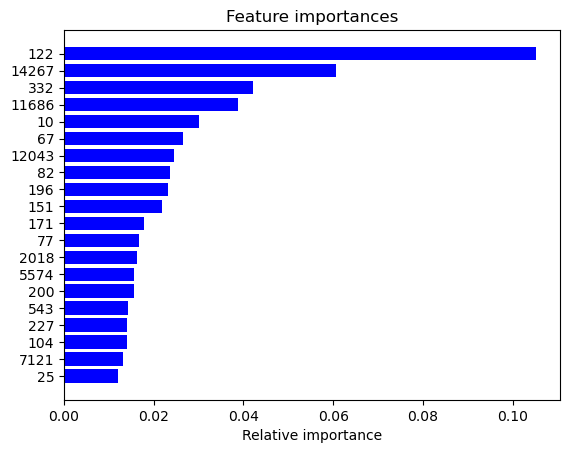

In [14]:
indices = np.argsort(importances)[-20:]
plt.title('Feature importances')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

### 상위 1280개 feature 전처리

In [16]:
feature_matrix = pd.Series(importances, features)
feature_matrix_sorted = feature_matrix.sort_values(ascending = False) #feature 내림차순으로 정렬
feature_matrix_sorted

122      0.105341
14267    0.060596
332      0.042078
11686    0.038866
10       0.030161
           ...   
5334     0.000000
5335     0.000000
5336     0.000000
5337     0.000000
14703    0.000000
Length: 14700, dtype: float64

In [20]:
feature_matrix_1280 = feature_matrix_sorted.head(1280)
feature_matrix_1280

122      0.105341
14267    0.060596
332      0.042078
11686    0.038866
10       0.030161
           ...   
9726     0.000000
10113    0.000000
9694     0.000000
9727     0.000000
9728     0.000000
Length: 1280, dtype: float64

In [21]:
feature_index = feature_matrix_1280.index.tolist()
len(feature_index)

1280

## 모델 학습

### feature 1280개인 데이터 셋 만들기

In [22]:
for i in range(len(feature_index)):
    feature_index[i] = feature_index[i] - 1

In [23]:
X = dataset.iloc[:, feature_index]

In [24]:
X

,122,14267,332,11686,10,67,12043,82,196,151,...,9696,10146,10147,9725,9695,9726,10113,9694,9727,9728
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,1,1,1,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1519,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1520,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1521,1,1,1,1,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    label,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

In [26]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)

print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (1218, 1280)
y_train:  (1218,)
X_test:  (305, 1280)
y_test:  (305,)


### 필요한 라이브러리

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 

## 1. RandomForest 모델

### 1.1 RandomForest 학습

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model_rf = RandomForestClassifier()
param_grid = { 
    'n_estimators': [5, 10, 50, 100],
}

grid_rf =  GridSearchCV(model_rf, param_grid = param_grid, cv = 10, refit = True)
grid_rf.fit(X_train, y_train)

print('best parameters: ', grid_rf.best_params_) # 최적 하이퍼 파라미터

best parameters:  {'n_estimators': 50}


In [30]:
y_pred = grid_rf.predict(X_test)

### 1.2 RandomForest 성능 측정

#### 1.2.1 정확도

In [31]:
print('accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)*100))

accuracy: 96.72


#### 1.2.2 confusion matrix

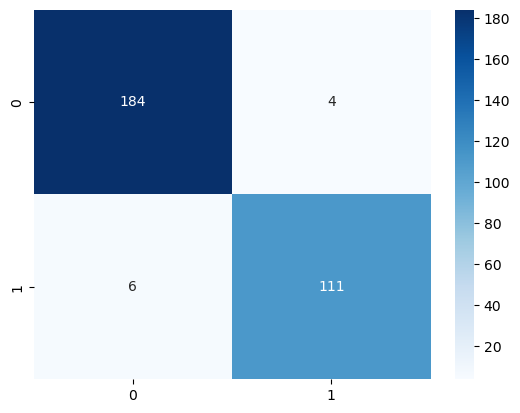

In [32]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
plt.show()

### 1.2.3 precision, recall, f1 score

In [33]:
print('precision: {:.2f}'.format(precision_score(y_test, y_pred)*100))
print('recall: {:.2f}'.format(recall_score(y_test, y_pred)*100))
print('f1 score: {:.2f}'.format(f1_score(y_test, y_pred)*100))

precision: 96.52
recall: 94.87
f1 score: 95.69


## 2. XGBoost 모델

### 2.1 XGBoost 학습

In [34]:
import xgboost as xgb

In [35]:
model_xgb = xgb.XGBClassifier() 
param_grid = { 
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'n_estimators': [5, 10, 50, 100],
    'max_depth': [None]
}

grid_xgb =  GridSearchCV(model_xgb, param_grid = param_grid, cv = 10, refit = True)
grid_xgb.fit(X_train, y_train)

print('best parameters: ', grid_xgb.best_params_) # 최적 하이퍼 파라미터

best parameters:  {'learning_rate': 0.4, 'max_depth': None, 'n_estimators': 50}


In [36]:
y_pred = grid_xgb.predict(X_test)

### 2.2 XGBoost 성능 측정

#### 2.2.1 정확도

In [37]:
print('accarncy: {:.2f}'.format(accuracy_score(y_test, y_pred)*100)) 

accarncy: 97.05


#### 2.2.2 confusion matrix

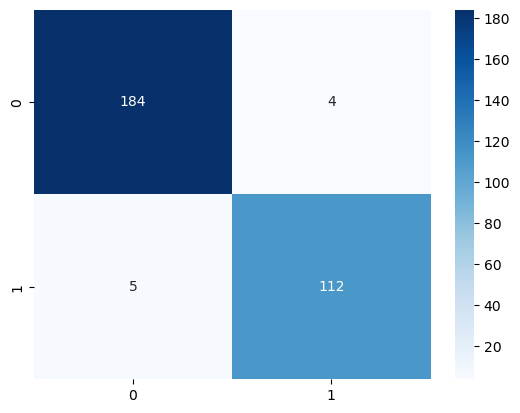

In [38]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
plt.show()

#### 2.2.3  percision, recall, f1 score

In [39]:
print('precision: {:.2f}'.format(precision_score(y_test, y_pred)*100))
print('recall: {:.2f}'.format(recall_score(y_test, y_pred)*100))
print('f1 score: {:.2f}'.format(f1_score(y_test, y_pred)*100))

precision: 96.55
recall: 95.73
f1 score: 96.14


## 3. SVM 모델

### 3.1 SVM 학습

In [40]:
from sklearn import svm
from sklearn.svm import SVC

In [41]:
model_svm = SVC() 
param_grid = { 
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

grid_svm =  GridSearchCV(model_svm, param_grid = param_grid, cv = 10, refit = True)
grid_svm.fit(X_train, y_train)

print('best parameters: ', grid_svm.best_params_) # 최적 하이퍼 파라미터

best parameters:  {'kernel': 'linear'}


In [42]:
model_linearsvm = SVC(kernel = 'linear') 
param_grid = { 
    'C': [0.01, 0.1, 1, 10, 100],
}

grid_linearsvm =  GridSearchCV(model_linearsvm, param_grid = param_grid, cv = 10, refit = True)
grid_linearsvm.fit(X_train, y_train)

print('best parameters: ', grid_linearsvm.best_params_) # 최적 하이퍼 파라미터

best parameters:  {'C': 0.1}


In [43]:
y_pred = grid_linearsvm.predict(X_test)

## 3.2 SVM 성능 측정

### 3.2.1 정확도

In [44]:
print('accarncy: {:.2f}'.format(accuracy_score(y_test, y_pred)*100)) 

accarncy: 97.38


### 3.2.2 confusion_matrix

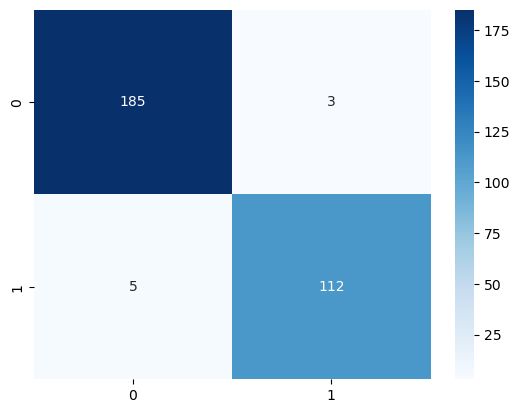

In [45]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
plt.show()

### 3.2.3 percision, recall, f1 score

In [46]:
print('precision: {:.2f}'.format(precision_score(y_test, y_pred)*100))
print('recall: {:.2f}'.format(recall_score(y_test, y_pred)*100))
print('f1 score: {:.2f}'.format(f1_score(y_test, y_pred)*100))

precision: 97.39
recall: 95.73
f1 score: 96.55
